<a href="https://colab.research.google.com/github/nazwa48/PCVK-_GENAP_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAPORAN PCVK Jobsheet 9

---


NIM : 2241720013

Nama : Nazwa Ayunda Mirrohillah

Kelas : TI-3C
## **Jobsheet 9 - Morfologi**

### **PRAKTIKUM**

1. Import folder yang ada di Drive Anda dengan cara sebagai berikut:

In [2]:
from google.colab import drive


# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan *Structuring Element Dilasi* (SED) berbentuk **cross 3 x 3 tanpa** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

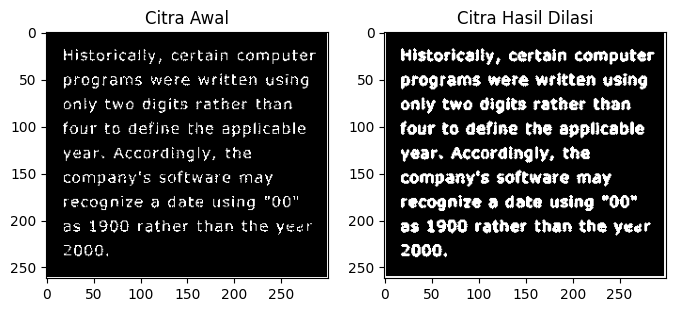

In [4]:
from scipy.ndimage import binary_dilation
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/PCVK/Images/morphology.png'
image = Image.open(image_path).convert('L')  # Konversi ke grayscale

# Convert to binary image
image_array = np.array(image)
binary_image = image_array > 128  # Menggunakan threshold untuk binarisasi

# Structuring Element berbentuk cross 3x3
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

# Fungsi dilasi menggunakan binary_dilation dari SciPy
dilated_image = binary_dilation(binary_image, structure=structuring_element)

# Plot hasil dilasi
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Citra Awal')

axes[1].imshow(dilated_image, cmap='gray')
axes[1].set_title('Citra Hasil Dilasi')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


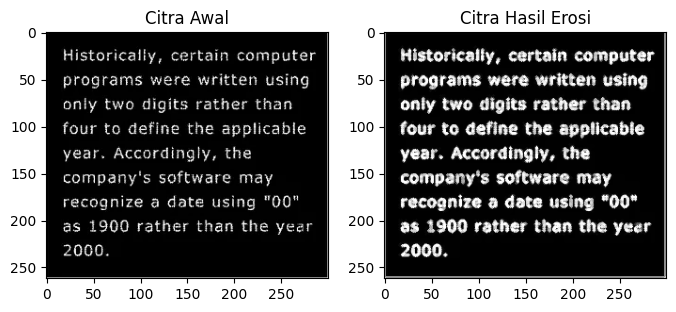

In [6]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', 0)

# Create the Structuring Element (cross 3x3)
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Apply the dilation operation
dilated_image = cv2.dilate(image, structuring_element)

# Display the Structuring Element
print("Structuring Element (Cross 3x3):\n", structuring_element)

# Plot the original and the dilated image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

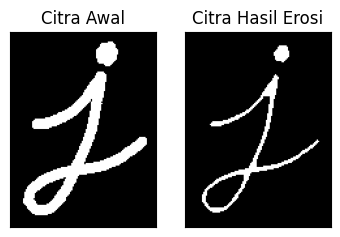

In [7]:
# Fungsi erosi tanpa library
def erosi_citra(F, k):
    # Ukuran gambar
    m, n = F.shape

    # Generate struktur elemen erosi (SE)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Load gambar
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)

# Cek apakah gambar berhasil dimuat
if img_e is None:
    print("Error: Gambar tidak ditemukan atau jalur salah!")
else:
    # Proses thresholding
    ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
    k = 5
    imgE = erosi_citra(thresh1, k)

    # Tampilkan gambar
    plt.subplot(131), plt.imshow(img_e, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(imgE, cmap='gray')
    plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
    plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


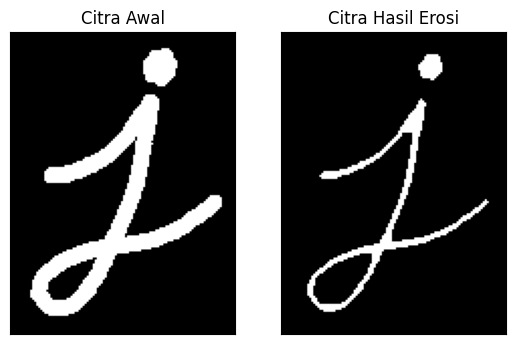

In [9]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

**Operasi Opening tanpa Library Morphology**

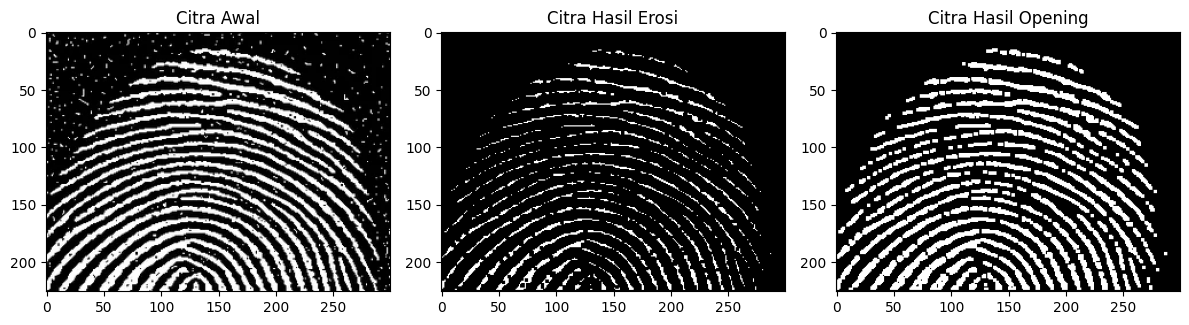

In [11]:
# Fungsi Erosi menggunakan SE 3x3
def erosi_citra(F, k):
    m, n = F.shape
    SE = np.ones((k, k), dtype=np.uint8)  # Structuring Element 3x3
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Fungsi Dilasi menggunakan SE 3x3
def dilasi_citra(F, k):
    m, n = F.shape
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgD = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgD[i, j] = np.max(product)

    return imgD

# Fungsi Opening (Erosi diikuti Dilasi)
def opening_citra(F, k):
    eroded = erosi_citra(F, k)  # Erosi
    dilated = dilasi_citra(eroded, k)  # Dilasi
    return dilated

# Load gambar sidik jari
img_path = "/content/drive/MyDrive/PCVK/Images/fingerprint.png"
img = cv2.imread(img_path, 0)  # Membaca gambar dalam grayscale

# Thresholding untuk menghasilkan citra biner
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Erosi dan Opening
k = 3  # Ukuran kernel 3x3
eroded_img = erosi_citra(thresh, k)  # Erosi
result_opening = opening_citra(thresh, k)  # Opening

# Tampilkan hasil
plt.figure(figsize=(12, 4))  # Ukuran figure lebar
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(1, 3, 3)
plt.imshow(result_opening, cmap='gray')
plt.title('Citra Hasil Opening')

plt.tight_layout()
plt.show()

**Operasi Opening Menggunakan Library Morphology**

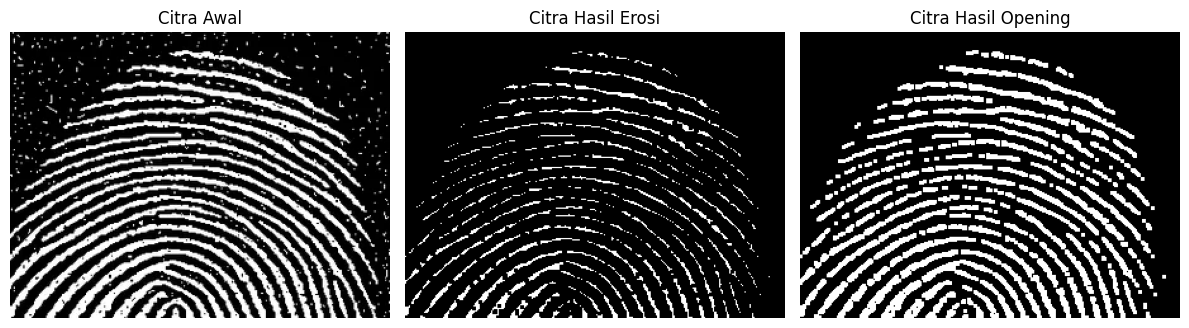

In [12]:
# Fungsi Erosi menggunakan library OpenCV
def erosi_citra(F, k):
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))  # Structuring Element 3x3
    imgE = cv2.erode(F, SE)  # Erosi menggunakan OpenCV
    return imgE

# Fungsi Dilasi menggunakan library OpenCV
def dilasi_citra(F, k):
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))  # Structuring Element 3x3
    imgD = cv2.dilate(F, SE)  # Dilasi menggunakan OpenCV
    return imgD

# Fungsi Opening (Erosi diikuti Dilasi)
def opening_citra(F, k):
    eroded = erosi_citra(F, k)  # Erosi
    dilated = dilasi_citra(eroded, k)  # Dilasi
    return dilated

# Load gambar sidik jari
img_path = "/content/drive/MyDrive/PCVK/Images/fingerprint.png"
img = cv2.imread(img_path, 0)  # Membaca gambar dalam grayscale

# Thresholding untuk menghasilkan citra biner
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Erosi dan Opening
k = 3  # Ukuran kernel 3x3
eroded_img = erosi_citra(thresh, k)  # Erosi
result_opening = opening_citra(thresh, k)  # Opening

# Tampilkan hasil
plt.figure(figsize=(12, 4))  # Ukuran figure lebar
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_opening, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.tight_layout()
plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

**Open Closing tanpa Library Morphology**

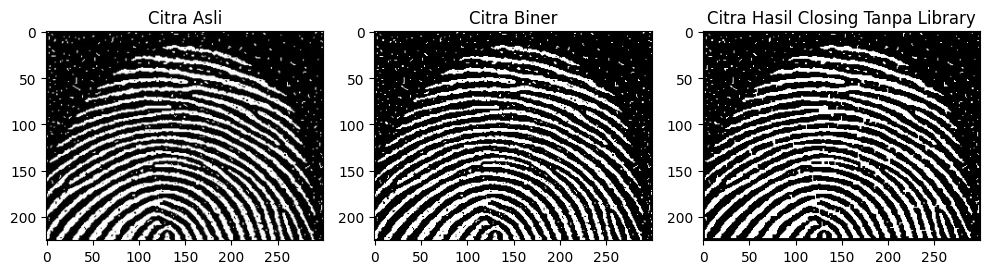

In [16]:
# Fungsi Erosi
def erosi_citra(F, k):
    m, n = F.shape
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Fungsi Dilasi
def dilasi_citra(F, k):
    m, n = F.shape
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgD = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgD[i, j] = np.max(product)

    return imgD

# Fungsi Closing (Dilasi diikuti Erosi)
def closing_citra(F, k):
    dilated = dilasi_citra(F, k)  # Dilasi
    eroded = erosi_citra(dilated, k)  # Erosi
    return eroded

# Load gambar
img_path = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(img_path, 0)  # Membaca gambar dalam grayscale

# Thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Operasi Closing
k = 3  # Ukuran kernel 3x3
result_closing = closing_citra(thresh, k)  # Closing

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner')

plt.subplot(1, 3, 3)
plt.imshow(result_closing, cmap='gray')
plt.title('Citra Hasil Closing Tanpa Library')

plt.tight_layout()
plt.show()

**Open Closing dengan Library Morphology**

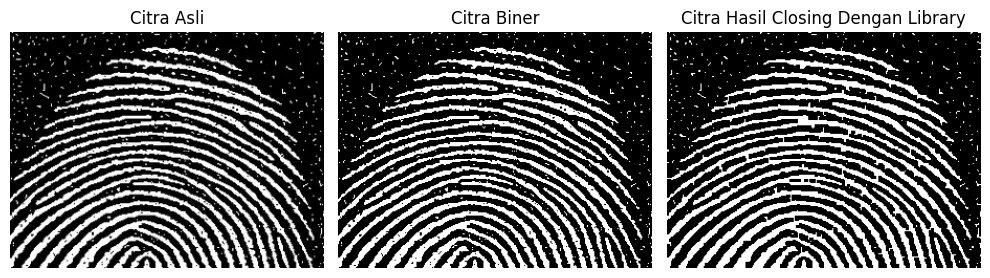

In [13]:
# Load gambar
img_path = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(img_path, 0)  # Membaca gambar dalam grayscale

# Thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 3x3
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi closing dengan OpenCV
result_closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_closing, cmap='gray')
plt.title('Citra Hasil Closing Dengan Library')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


SED = Cross 3


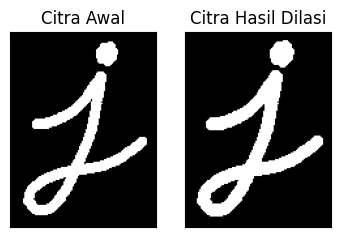

SED = Cross 5


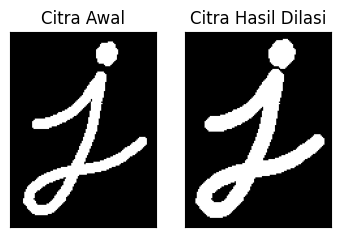

In [18]:

#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

SED = Circle 3


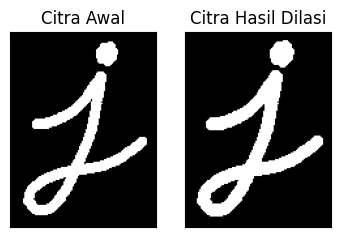

SED = Circle 5


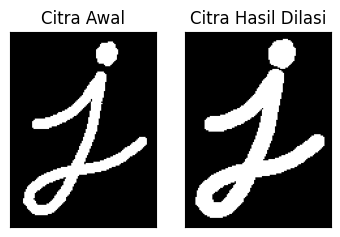

In [20]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

SE = Rectangle 3x5


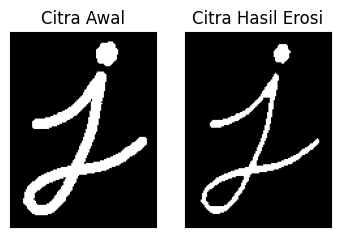

SE = Rectangle 5x7


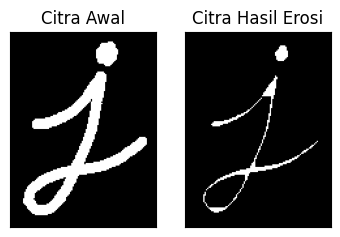

In [22]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SE = Line Vertikal 3


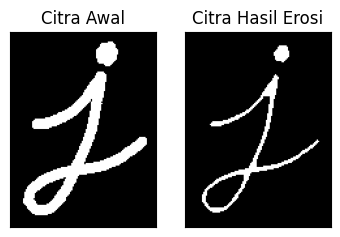

SE = Line Vertikal 5


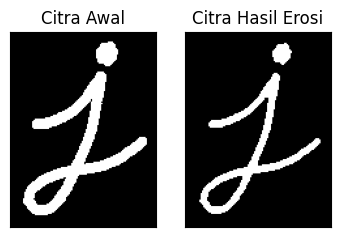

In [24]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()